### <b>Importing the dependencies</b>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### <b>Load the dataset and Preprocessing</b>

##### Load the dataset

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Finding missing values

In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset.isnull().sum()/dataset.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Finding Duplicates

In [6]:
dataset.duplicated().sum()

0

#### Identifying Garbage values

In [7]:
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        print(f"{i} has {dataset[i].nunique()} unique values")
        print(f"{i} has {dataset[i].value_counts()} unique value counts")
        

Loan_ID has 614 unique values
Loan_ID has Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64 unique value counts
Gender has 2 unique values
Gender has Gender
Male      489
Female    112
Name: count, dtype: int64 unique value counts
Married has 2 unique values
Married has Married
Yes    398
No     213
Name: count, dtype: int64 unique value counts
Dependents has 4 unique values
Dependents has Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64 unique value counts
Education has 2 unique values
Education has Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64 unique value counts
Self_Employed has 2 unique values
Self_Employed has Self_Employed
No     500
Yes     82
Name: count, dtype: int64 unique value counts
Property_Area has 3 unique values
Property_Area has Property_Area
Semiurban    233
Ur

### <b>Missing Value treatments</b>

#### For neumerical data

In [8]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [9]:
for i in dataset.select_dtypes(include='number').columns:
    dataset[i] = imputer.fit_transform(dataset[[i]])

#### For Categorical

In [10]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i] = dataset[i].fillna(dataset[i].mode()[0])

In [11]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### <b>Exploratory Data Analysis (EDA) </b>

#### Descriptive Statistics

In [12]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
dataset.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


#### Undestanding the distribution of neumerical values

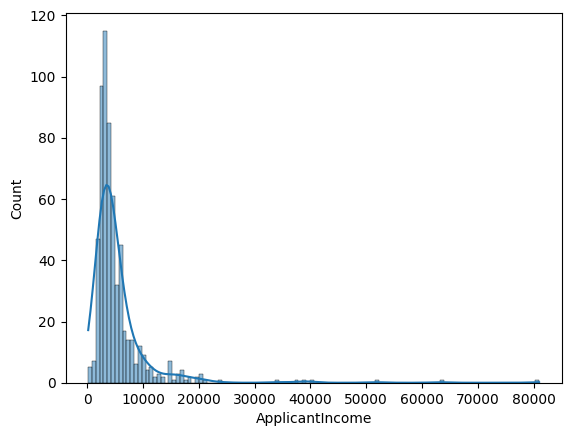

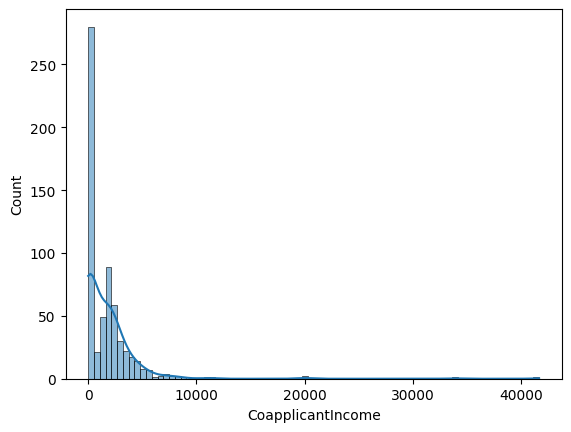

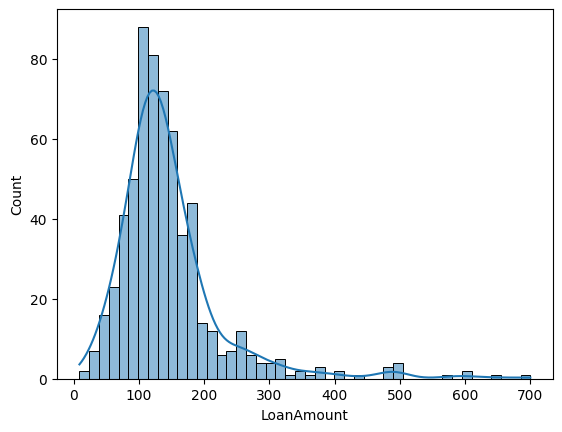

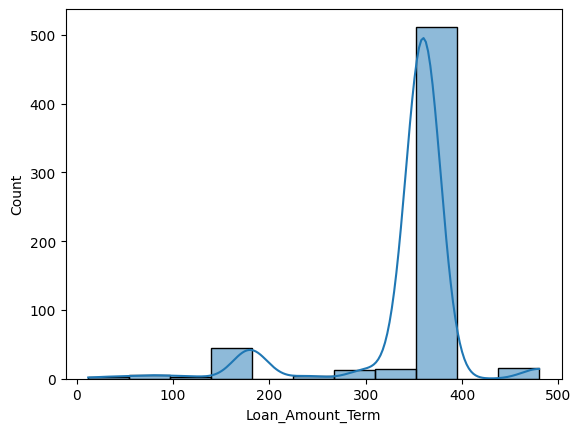

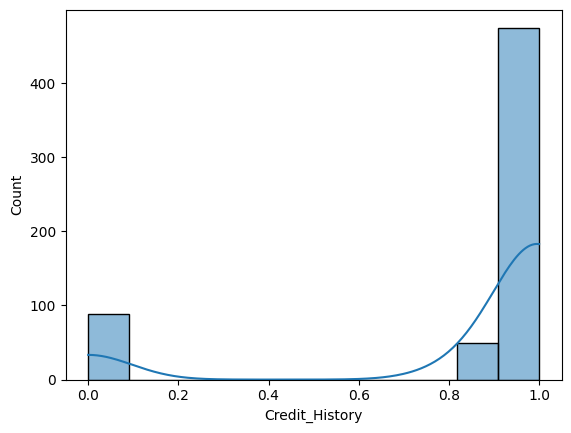

In [14]:
for i in dataset.select_dtypes(include='number').columns:
    sns.histplot(data=dataset, x=i, kde=True)
    plt.show()

#### Identifying Outliers

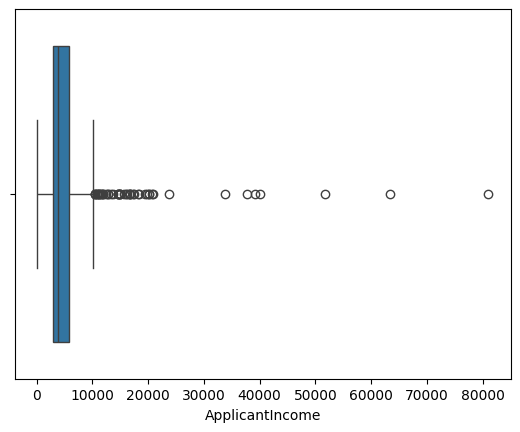

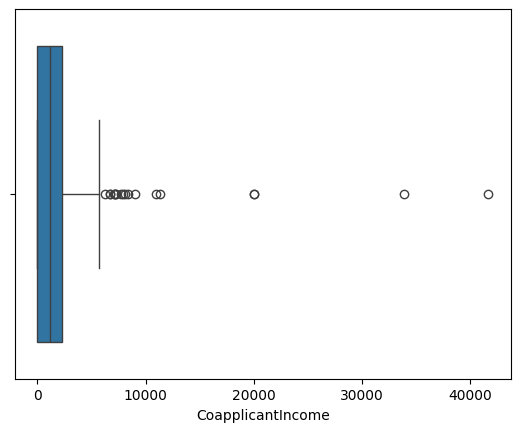

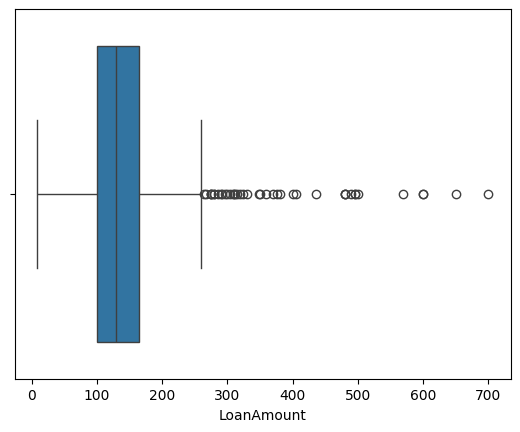

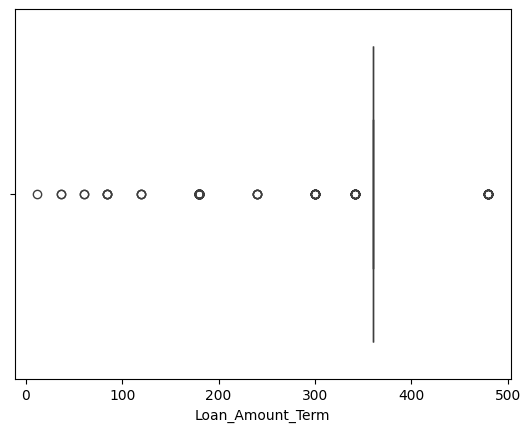

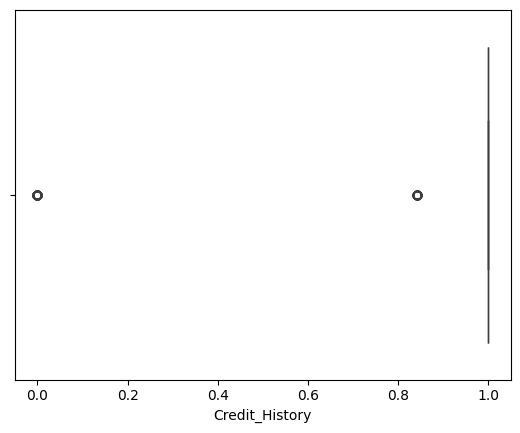

In [16]:
for i in dataset.select_dtypes(include='number').columns:
    sns.boxplot(data=dataset, x=i)
    plt.show()

#### Undestand the relationships in data columns

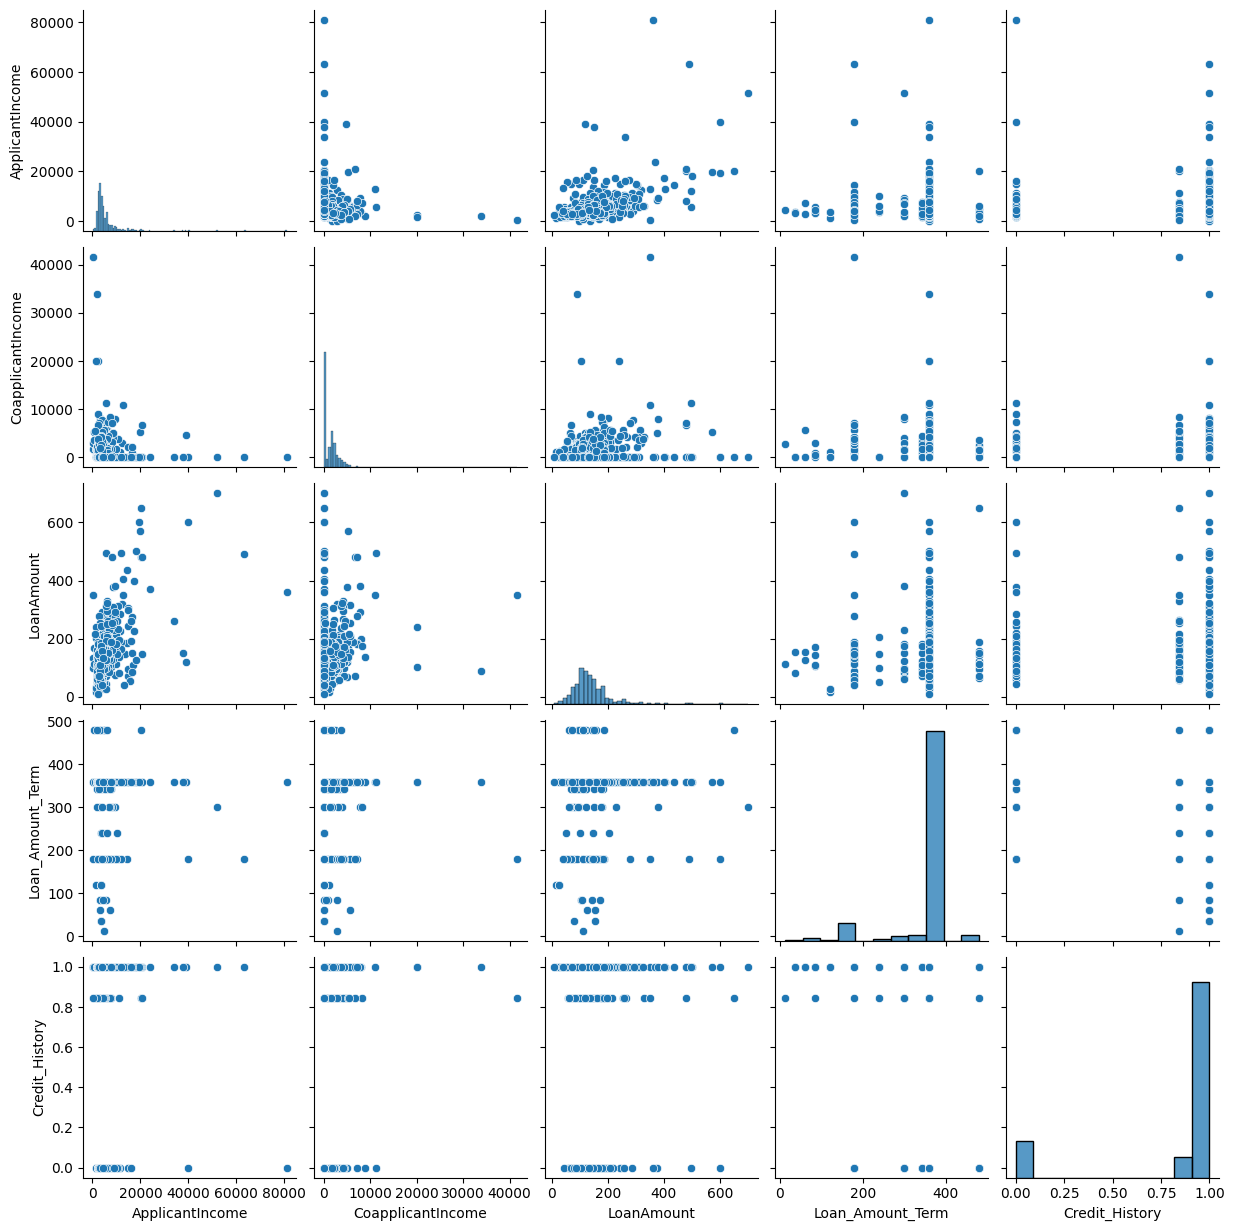

In [17]:
sns.pairplot(dataset.select_dtypes(include='number'))
plt.show()

In [18]:
dataset.select_dtypes(include='number').corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<Axes: >

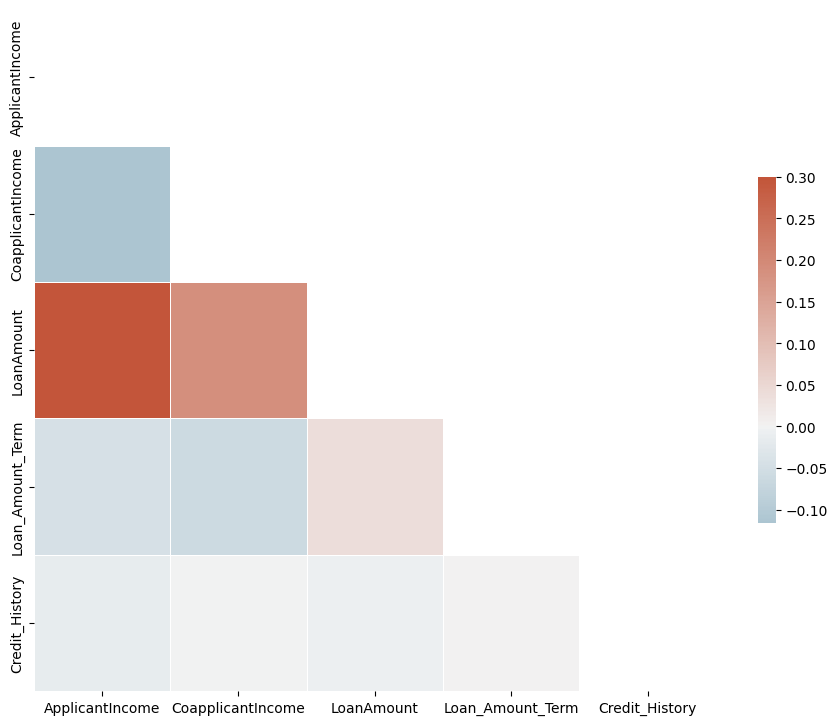

In [19]:
# Compute the correlation matrix
corr = dataset.select_dtypes(include='number').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})